<a href="https://colab.research.google.com/github/RomanaNourin/imageprocessing/blob/main/new_Crime_(CNN%2Blstm)_hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.15


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!kaggle datasets download -d odins0n/ucf-crime-dataset

Dataset URL: https://www.kaggle.com/datasets/odins0n/ucf-crime-dataset
License(s): CC0-1.0
100% 11.0G/11.0G [09:27<00:00, 28.5MB/s]
100% 11.0G/11.0G [09:27<00:00, 20.8MB/s]


In [ ]:
!unzip -qq "/content/ucf-crime-dataset.zip"

# **Importing Libraries**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import random

**Loading Data**

In [ ]:
test_dir = '/content/Test'
train_dir = '/content/Train'

In [ ]:
# Define the categories and labels
categories_labels = {'Abuse': 0, 'Arrest': 1, 'Arson': 2, 'Assault': 3, 'Burglary': 4, 'Explosion': 5, 'Fighting': 6, 'Vandalism': 7, 'Stealing': 8, 'Robbery': 9, 'Shooting': 10, 'Shoplifting': 11}

In [ ]:
def load_data(base_dir, categories_labels):
    data = []

    # Go through each category
    for category, label in categories_labels.items():
        # The path to the category directory
        category_dir = os.path.join(base_dir, category)

        # Make sure the directory exists
        if os.path.isdir(category_dir):
            # Go through each file in the directory
            for filename in tqdm(os.listdir(category_dir), desc=f"Loading {category}"):
                # Make sure the file is an image
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    # The path to the image
                    image_path = os.path.join(category_dir, filename)

                    try:
                        # Load the image
                        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                        # Resize the image
                        image = cv2.resize(image, (50, 50))

                        # Reshape the image to 4D array (ImageDataGenerator requires 4D array)
                        image = image.reshape((1,) + image.shape + (1,))

                        # Add the image and its label to the data
                        data.append([image, label])
                    except Exception as e:
                        print(f"Error loading image {image_path}: {e}")

    return data

# Load the training and test data
training_data = load_data(train_dir, categories_labels)
test_data = load_data(test_dir, categories_labels)

# Combine the training and test data
total_data = training_data + test_data

print(f"Loaded {len(total_data)} images.")

Loading Shoplifting: 100%|██████████| 7623/7623 [00:01<00:00, 4996.51it/s]

Loaded 338784 images.


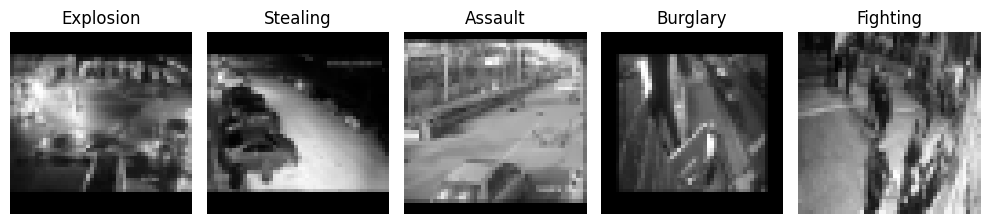

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample_images(data, categories_labels, num_samples=5):
    # Reverse the categories_labels dictionary to map labels back to category names
    labels_to_categories = {v: k for k, v in categories_labels.items()}

    plt.figure(figsize=(10, 10))

    # Randomly select a few images to display
    indices = np.random.choice(len(data), num_samples, replace=False)

    for i, idx in enumerate(indices):
        image, label = data[idx]

        # Reshape the image to display correctly (50x50 in your case)
        image = image.reshape(50, 50)

        # Get the corresponding category name for the label
        category_name = labels_to_categories[label]

        # Display the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(category_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming you have a dictionary 'categories_labels'
# e.g., categories_labels = {'Abuse': 0, 'Arrest': 1, 'Arson': 2, ...}

# Display 5 sample images from total_data with their categorical labels
show_sample_images(total_data, categories_labels, num_samples=5)


**Installing packages**

In [ ]:
!sudo pip install keras
!pip install np_utils
!pip install pydot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=80be6c9c67a1bbbc098a2991824502f9eee737f8ee3ee462e714b810dca4fac2
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
from tensorflow.keras.utils import plot_model


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from keras.layers import LSTM, concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.python.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from keras.regularizers import l2
import time

# Assuming total_data and categories_labels are already available
# Initialize lists to store the images and the labels
images = []
labels = []

# Go through each image and its label in the total_data
for image, label in total_data:
    images.append(image)
    labels.append(label)

# Convert the lists into numpy arrays
images = np.array(images)
labels = np.array(labels)
print(images.shape)

# Reshape images for LSTM
images_lstm = images.reshape(images.shape[0], -1, 1)  # Added third dimension for features

# Set a seed for reproducibility
seed = 42

# Split the data into training and testing sets for CNN
train_images_cnn, test_images_cnn, train_labels_cnn, test_labels_cnn = train_test_split(images, labels, test_size=0.2, random_state=seed)

# Split the data into training and testing sets for LSTM
train_images_lstm, test_images_lstm, train_labels_lstm, test_labels_lstm = train_test_split(images_lstm, labels, test_size=0.2, random_state=seed)

# Convert labels to categorical for CNN
train_labels_cnn = np_utils.to_categorical(train_labels_cnn, len(categories_labels))
test_labels_cnn = np_utils.to_categorical(test_labels_cnn, len(categories_labels))

# Convert labels to categorical for LSTM
train_labels_lstm = np_utils.to_categorical(train_labels_lstm, len(categories_labels))
test_labels_lstm = np_utils.to_categorical(test_labels_lstm, len(categories_labels))

# Remove the second dimension from data for CNN input (ensure 4D input for CNN)
train_images_cnn = np.squeeze(train_images_cnn, axis=1)  # Squeeze the extra dimension
test_images_cnn = np.squeeze(test_images_cnn, axis=1)    # Squeeze the extra dimension

# Ensure LSTM data is correctly shaped as 3D for LSTM (retain the shape for LSTM input)
train_images_lstm = train_images_lstm.reshape(train_images_lstm.shape[0], -1, 1)
test_images_lstm = test_images_lstm.reshape(test_images_lstm.shape[0], -1, 1)

# CNN Model with regularization
model_CNN = Sequential()
model_CNN.add(Conv2D(64, kernel_size=(3, 3), padding='same', input_shape=(50, 50, 1), kernel_regularizer=l2(0.01)))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D((2, 2), padding='same'))
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_CNN.add(Dropout(0.25))
model_CNN.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_CNN.add(Dropout(0.4))
model_CNN.add(Flatten())
model_CNN.add(Dense(256, kernel_regularizer=l2(0.01)))
model_CNN.add(LeakyReLU(alpha=0.1))
model_CNN.add(Dropout(0.5))

# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=8, return_sequences=True, input_shape=(2500, 1), activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm.add(LSTM(units=8, return_sequences=True))
model_lstm.add(Dense(4, activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Flatten())

# Combine CNN and LSTM model
nb_classes = len(categories_labels)
combined = concatenate([model_CNN.output, model_lstm.output], axis=-1)
output = Dense(nb_classes, activation='softmax')(combined)
model_final = Model(inputs=[model_CNN.input, model_lstm.input], outputs=output)

# Plot and compile the model
plot_model(model_final, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# model_final.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import Callback

class HybridOptimizer(Callback):
    def __init__(self, sgd, adam, switch_epoch):
        super(HybridOptimizer, self).__init__()
        self.sgd = sgd
        self.adam = adam
        self.switch_epoch = switch_epoch

    def on_epoch_begin(self, epoch, logs=None):
        if epoch < self.switch_epoch:
            print(f"Epoch {epoch + 1}: Using Adam optimizer")
            self.model.optimizer = self.adam
        else:
            print(f"Epoch {epoch + 1}: Switching to SGD optimizer")
            self.model.optimizer = self.sgd

# Initialize optimizers
adam = Adam(learning_rate=0.001)
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Use Adam for the first 10 epochs, then switch to SGD
switch_epoch = 10

# Initialize hybrid optimizer callback
hybrid_optimizer_callback = HybridOptimizer(sgd, adam, switch_epoch)

# Compile model (initially with Adam or any optimizer)
model_final.compile(loss='categorical_crossentropy',
                    optimizer=adam,
                    metrics=['accuracy'])
# Callbacks
csv_logger = CSVLogger('training_alexnet.log', separator=',', append=False)
mc = ModelCheckpoint('CNN_AlexNet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# Train with the hybrid optimizer
history = model_final.fit([train_images_cnn, train_images_lstm], train_labels_lstm,
                          batch_size=1000, epochs=20,
                          validation_data=([test_images_cnn, test_images_lstm], test_labels_lstm),
                          callbacks=[hybrid_optimizer_callback, mc, csv_logger])




# Training
time1 = time.time()
history = model_final.fit([train_images_cnn, train_images_lstm], train_labels_lstm, batch_size=1000, epochs=20, validation_data=([test_images_cnn, test_images_lstm], test_labels_lstm), callbacks=[mc, csv_logger])
print(("Training time=", time.time()-time1))

# Save training history
np.save("CNN_AlexNet_history.npy", history.history)


(338784, 1, 50, 50, 1)
Epoch 1: Using Adam optimizer
Epoch 1/20
272/272 [==============================] - ETA: 0s - loss: 4.7273 - accuracy: 0.5645
Epoch 00001: val_loss improved from inf to 2.64399, saving model to CNN_AlexNet.h5
272/272 [==============================] - 131s 467ms/step - loss: 4.7273 - accuracy: 0.5645 - val_loss: 2.6440 - val_accuracy: 0.5833
Epoch 2: Using Adam optimizer
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


272/272 [==============================] - ETA: 0s - loss: 1.3027 - accuracy: 0.8967
Epoch 00002: val_loss improved from 2.64399 to 0.91503, saving model to CNN_AlexNet.h5
272/272 [==============================] - 125s 460ms/step - loss: 1.3027 - accuracy: 0.8967 - val_loss: 0.9150 - val_accuracy: 0.9274
Epoch 3: Using Adam optimizer
Epoch 3/20
272/272 [==============================] - ETA: 0s - loss: 0.7170 - accuracy: 0.9431
Epoch 00003: val_loss improved from 0.91503 to 0.53520, saving model to CNN_AlexNet.h5
272/272 [==============================] - 125s 460ms/step - loss: 0.7170 - accuracy: 0.9431 - val_loss: 0.5352 - val_accuracy: 0.9602
Epoch 4: Using Adam optimizer
Epoch 4/20
272/272 [==============================] - ETA: 0s - loss: 0.4610 - accuracy: 0.9591
Epoch 00004: val_loss improved from 0.53520 to 0.33871, saving model to CNN_AlexNet.h5
272/272 [==============================] - 125s 459ms/step - loss: 0.4610 - accuracy: 0.9591 - val_loss: 0.3387 - val_accuracy: 0.97

In [ ]:

# Step 1: Convert one-hot encoded labels back to class indices
train_class_labels_cnn = np.argmax(train_labels_cnn, axis=1)
test_class_labels_cnn = np.argmax(test_labels_cnn, axis=1)

train_class_labels_lstm = np.argmax(train_labels_lstm, axis=1)
test_class_labels_lstm = np.argmax(test_labels_lstm, axis=1)

# Step 2: Count the number of images in each class for both training and test sets
def count_images_per_class(class_labels, num_classes):
    return {f'Class {i}': np.sum(class_labels == i) for i in range(num_classes)}

# Define the number of classes based on categories_labels length
num_classes = len(categories_labels)

# CNN: Count images in each class for training and testing sets
cnn_train_class_counts = count_images_per_class(train_class_labels_cnn, num_classes)
cnn_test_class_counts = count_images_per_class(test_class_labels_cnn, num_classes)

# LSTM: Count images in each class for training and testing sets
lstm_train_class_counts = count_images_per_class(train_class_labels_lstm, num_classes)
lstm_test_class_counts = count_images_per_class(test_class_labels_lstm, num_classes)

# Print results
print("CNN Training Set Image Counts:", cnn_train_class_counts)
print("CNN Testing Set Image Counts:", cnn_test_class_counts)
print("LSTM Training Set Image Counts:", lstm_train_class_counts)
print("LSTM Testing Set Image Counts:", lstm_test_class_counts)


CNN Training Set Image Counts: {'Class 0': 15557, 'Class 1': 23666, 'Class 2': 21863, 'Class 3': 10417, 'Class 4': 37766, 'Class 5': 20249, 'Class 6': 20623, 'Class 7': 11798, 'Class 8': 37391, 'Class 9': 33850, 'Class 10': 11859, 'Class 11': 25988}
CNN Testing Set Image Counts: {'Class 0': 3816, 'Class 1': 6096, 'Class 2': 5351, 'Class 3': 2600, 'Class 4': 9395, 'Class 5': 5014, 'Class 6': 5292, 'Class 7': 2939, 'Class 8': 9395, 'Class 9': 8478, 'Class 10': 2911, 'Class 11': 6470}
LSTM Training Set Image Counts: {'Class 0': 15557, 'Class 1': 23666, 'Class 2': 21863, 'Class 3': 10417, 'Class 4': 37766, 'Class 5': 20249, 'Class 6': 20623, 'Class 7': 11798, 'Class 8': 37391, 'Class 9': 33850, 'Class 10': 11859, 'Class 11': 25988}
LSTM Testing Set Image Counts: {'Class 0': 3816, 'Class 1': 6096, 'Class 2': 5351, 'Class 3': 2600, 'Class 4': 9395, 'Class 5': 5014, 'Class 6': 5292, 'Class 7': 2939, 'Class 8': 9395, 'Class 9': 8478, 'Class 10': 2911, 'Class 11': 6470}


In [ ]:
from keras.models import load_model
fashion_model = load_model('/content/CNN_AlexNet.h5') # load model
fashion_model.summary() # summarize model.

from contextlib import redirect_stdout
with open('/content/CNN_AlexNet.h5'+".xls", 'w') as f:
    with redirect_stdout(f):
        fashion_model.summary()

val_loss, val_accuracy=fashion_model.evaluate([test_images_cnn, test_images_lstm] ,test_labels_cnn) ## to get test accuracy and losses
print(val_loss, val_accuracy)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_3_input (InputLayer  [(None, 50, 50, 1)]          0         []                            
 )                                                                                                
                                                                                                  
 conv2d_3 (Conv2D)           (None, 50, 50, 64)           640       ['conv2d_3_input[0][0]']      
                                                                                                  
 leaky_re_lu_4 (LeakyReLU)   (None, 50, 50, 64)           0         ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 64)           0         ['leaky_re_lu_4[0][0]'] 

In [ ]:
from keras.models import load_model
from contextlib import redirect_stdout

# Load the model
model_path = '/content/CNN_AlexNet.h5'
fashion_model = load_model(model_path)

# Summarize the model and save the summary to a text file
summary_file_path = model_path + ".txt"
with open(summary_file_path, 'w') as f:
    with redirect_stdout(f):
        fashion_model.summary()

# Print model summary to console (optional)
fashion_model.summary()

# Evaluate the model
val_loss, val_accuracy = fashion_model.evaluate([test_images_cnn, test_images_lstm], test_labels_cnn)

# Print evaluation results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# For AlexNet, if you have a separate model, load and evaluate it similarly
alexnet_model_path = '/content/CNN_AlexNet.h5'  # Update the path if needed
alexnet_model = load_model(alexnet_model_path)

# Save the AlexNet model summary
alexnet_summary_file_path = alexnet_model_path + ".txt"
with open(alexnet_summary_file_path, 'w') as f:
    with redirect_stdout(f):
        alexnet_model.summary()

# Print AlexNet model summary to console (optional)
alexnet_model.summary()

# Evaluate the AlexNet model
val_loss_alexnet, val_accuracy_alexnet = alexnet_model.evaluate([test_images_cnn, test_images_lstm], test_labels_lstm)

# Print evaluation results for AlexNet
print(f"AlexNet Validation Loss: {val_loss_alexnet}")
print(f"AlexNet Validation Accuracy: {val_accuracy_alexnet}")


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_3_input (InputLayer  [(None, 50, 50, 1)]          0         []                            
 )                                                                                                
                                                                                                  
 conv2d_3 (Conv2D)           (None, 50, 50, 64)           640       ['conv2d_3_input[0][0]']      
                                                                                                  
 leaky_re_lu_4 (LeakyReLU)   (None, 50, 50, 64)           0         ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 64)           0         ['leaky_re_lu_4[0][0]'] 

In [ ]:
import time
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import jaccard_score, cohen_kappa_score, matthews_corrcoef

# Start the timer for classification
time2 = time.time()

# Predict probabilities for both CNN and LSTM test images
predict_prob = fashion_model.predict([test_images_cnn, test_images_lstm])

# Convert predicted probabilities to class labels
y_pred = np.argmax(predict_prob, axis=1)

# Classification time
print('Classification time:', time.time() - time2)

# Ground truth (actual) labels
y_true = np.argmax(test_labels_cnn, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
print('Classification Report:')
print(classification_report(y_true, y_pred))

# Precision, Recall, F1 Score (weighted)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 Score: %f' % f1)

# IoU (Jaccard Score)
iou = jaccard_score(y_true, y_pred, average='micro')
print('IoU (Jaccard Index):', iou)

# Cohen's Kappa Score
kappa = cohen_kappa_score(y_true, y_pred)
print('Cohen\'s Kappa: %f' % kappa)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_true, y_pred)
print('Matthews Correlation Coefficient (MCC): %f' % mcc)

# Model evaluation on test set
test_eval = fashion_model.evaluate([test_images_cnn, test_images_lstm], test_labels_cnn)
print('Test Loss:', test_eval[0])
print('Test Accuracy:', test_eval[1])

# Model evaluation on training set
loss_train, accuracy_train = fashion_model.evaluate([train_images_cnn, train_images_lstm], train_labels_cnn)
print('Train Loss:', loss_train, 'Train Accuracy:', accuracy_train)


2118/2118 [==============================] - 110s 51ms/step
Classification time: 111.47344827651978
Confusion Matrix:
[[3787    7    2    0    1    1    3    3    4    7    1    0]
 [   5 6044   10    4    3    1    2    1    0    6   11    9]
 [   7   14 5302    2    3    3    1    2    5   11    0    1]
 [   2    1    2 2563    3    1    3    3    4   18    0    0]
 [   3    6    1    0 9335    0    0    1    3   42    3    1]
 [   7    5   10    0    2 4959    2    4    2   20    3    0]
 [   4    5    5    1    3    2 5258    1    2    8    2    1]
 [   2    2    2    2    3    6    3 2904    6    9    0    0]
 [   2    3    3    3    3    3    1    6 9344   25    1    1]
 [   2    2    2    3    8    4    4    3   14 8436    0    0]
 [   4   37    2    1    4    1    0    1    1    4 2856    0]
 [   1    6    3    0    0    0    0    0    0    3    0 6457]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    

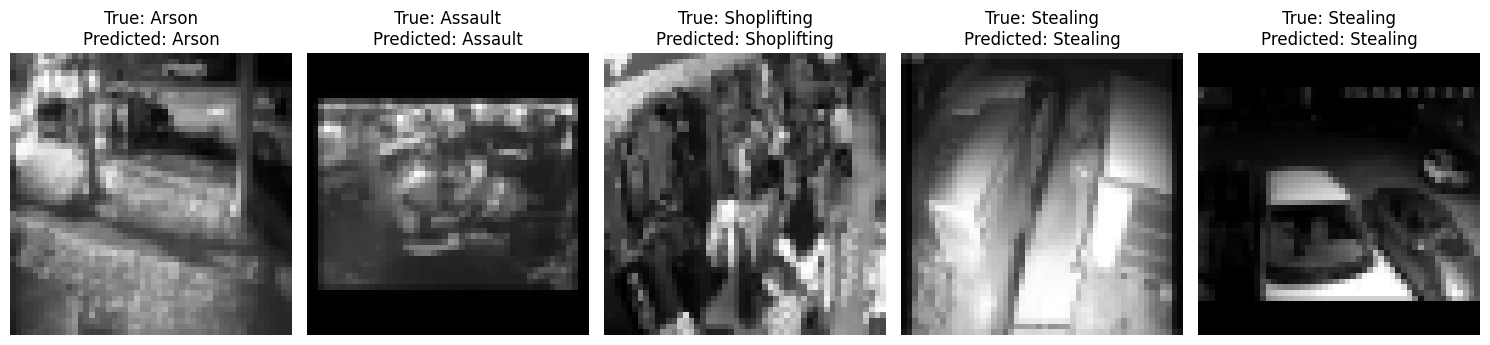

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_validation_images(test_images_cnn, test_images_lstm, y_true, y_pred, categories_labels, num_samples=5):
    # Reverse the categories_labels dictionary to map labels back to category names
    labels_to_categories = {v: k for k, v in categories_labels.items()}

    plt.figure(figsize=(15, 15))

    # Randomly select a few images to display
    indices = np.random.choice(len(test_images_cnn), num_samples, replace=False)

    for i, idx in enumerate(indices):
        image = test_images_cnn[idx]

        # Get the true and predicted labels
        true_label = labels_to_categories[y_true[idx]]
        predicted_label = labels_to_categories[y_pred[idx]]

        # Reshape the image to display correctly (50x50 in your case)
        image = image.reshape(50, 50)

        # Display the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming y_true and y_pred are already calculated
y_true = np.argmax(test_labels_cnn, axis=1)  # Convert one-hot encoded labels to class integers

# Display 5 validation images with their true and predicted labels
show_validation_images(test_images_cnn, test_images_lstm, y_true, y_pred, categories_labels, num_samples=5)


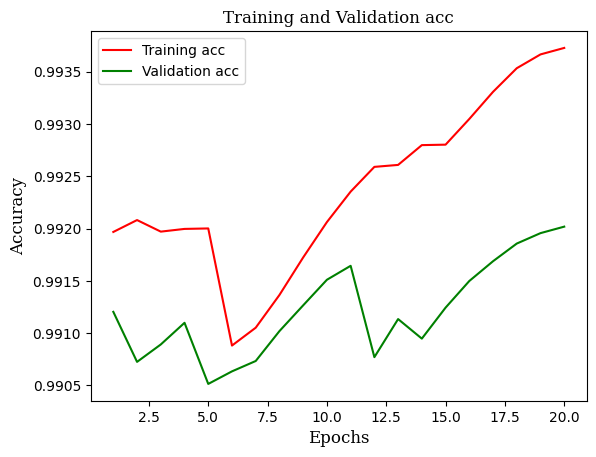

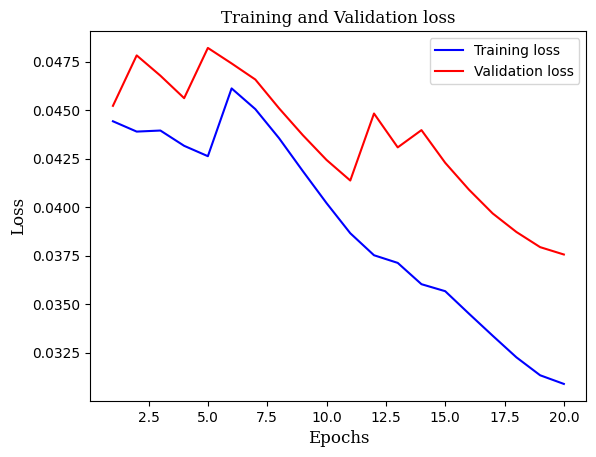

In [ ]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1, len(acc_values)+1)
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
loss_values=smooth_curve(loss_values)
val_loss_values=smooth_curve(val_loss_values)
acc_values=smooth_curve(acc_values)
val_acc_values=smooth_curve(val_acc_values)

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12}


plt.plot(epochs, acc_values, 'r-', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.title('Training and Validation acc', fontdict=font)
plt.xlabel('Epochs', fontdict=font)
plt.ylabel('Accuracy', fontdict=font)
plt.legend()
plt.savefig("accuracy"+'CNN_LSTM'+".png")
plt.show()

plt.plot(epochs, loss_values, 'b-', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation loss', fontdict=font)
plt.xlabel('Epochs',fontdict=font)
plt.ylabel('Loss',fontdict=font)
plt.legend()
plt.savefig("loss"+'CNN_LSTM'+".png")
plt.show()

Confusion matrix, without normalization
[[3787    7    2    0    1    1    3    3    4    7    1    0]
 [   5 6044   10    4    3    1    2    1    0    6   11    9]
 [   7   14 5302    2    3    3    1    2    5   11    0    1]
 [   2    1    2 2563    3    1    3    3    4   18    0    0]
 [   3    6    1    0 9335    0    0    1    3   42    3    1]
 [   7    5   10    0    2 4959    2    4    2   20    3    0]
 [   4    5    5    1    3    2 5258    1    2    8    2    1]
 [   2    2    2    2    3    6    3 2904    6    9    0    0]
 [   2    3    3    3    3    3    1    6 9344   25    1    1]
 [   2    2    2    3    8    4    4    3   14 8436    0    0]
 [   4   37    2    1    4    1    0    1    1    4 2856    0]
 [   1    6    3    0    0    0    0    0    0    3    0 6457]]


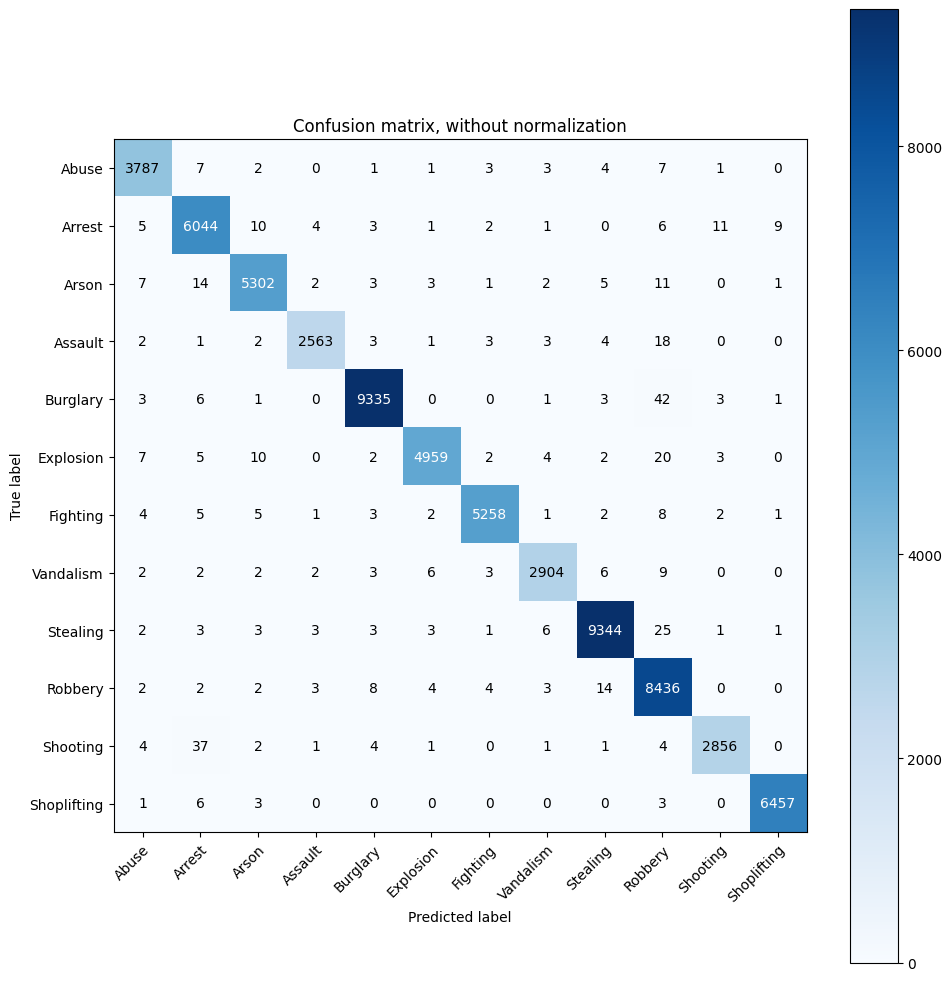

Normalized confusion matrix
[[9.92e-01 1.83e-03 5.24e-04 0.00e+00 2.62e-04 2.62e-04 7.86e-04 7.86e-04
  1.05e-03 1.83e-03 2.62e-04 0.00e+00]
 [8.20e-04 9.91e-01 1.64e-03 6.56e-04 4.92e-04 1.64e-04 3.28e-04 1.64e-04
  0.00e+00 9.84e-04 1.80e-03 1.48e-03]
 [1.31e-03 2.62e-03 9.91e-01 3.74e-04 5.61e-04 5.61e-04 1.87e-04 3.74e-04
  9.34e-04 2.06e-03 0.00e+00 1.87e-04]
 [7.69e-04 3.85e-04 7.69e-04 9.86e-01 1.15e-03 3.85e-04 1.15e-03 1.15e-03
  1.54e-03 6.92e-03 0.00e+00 0.00e+00]
 [3.19e-04 6.39e-04 1.06e-04 0.00e+00 9.94e-01 0.00e+00 0.00e+00 1.06e-04
  3.19e-04 4.47e-03 3.19e-04 1.06e-04]
 [1.40e-03 9.97e-04 1.99e-03 0.00e+00 3.99e-04 9.89e-01 3.99e-04 7.98e-04
  3.99e-04 3.99e-03 5.98e-04 0.00e+00]
 [7.56e-04 9.45e-04 9.45e-04 1.89e-04 5.67e-04 3.78e-04 9.94e-01 1.89e-04
  3.78e-04 1.51e-03 3.78e-04 1.89e-04]
 [6.81e-04 6.81e-04 6.81e-04 6.81e-04 1.02e-03 2.04e-03 1.02e-03 9.88e-01
  2.04e-03 3.06e-03 0.00e+00 0.00e+00]
 [2.13e-04 3.19e-04 3.19e-04 3.19e-04 3.19e-04 3.19e-04 1.06e-04 6.3

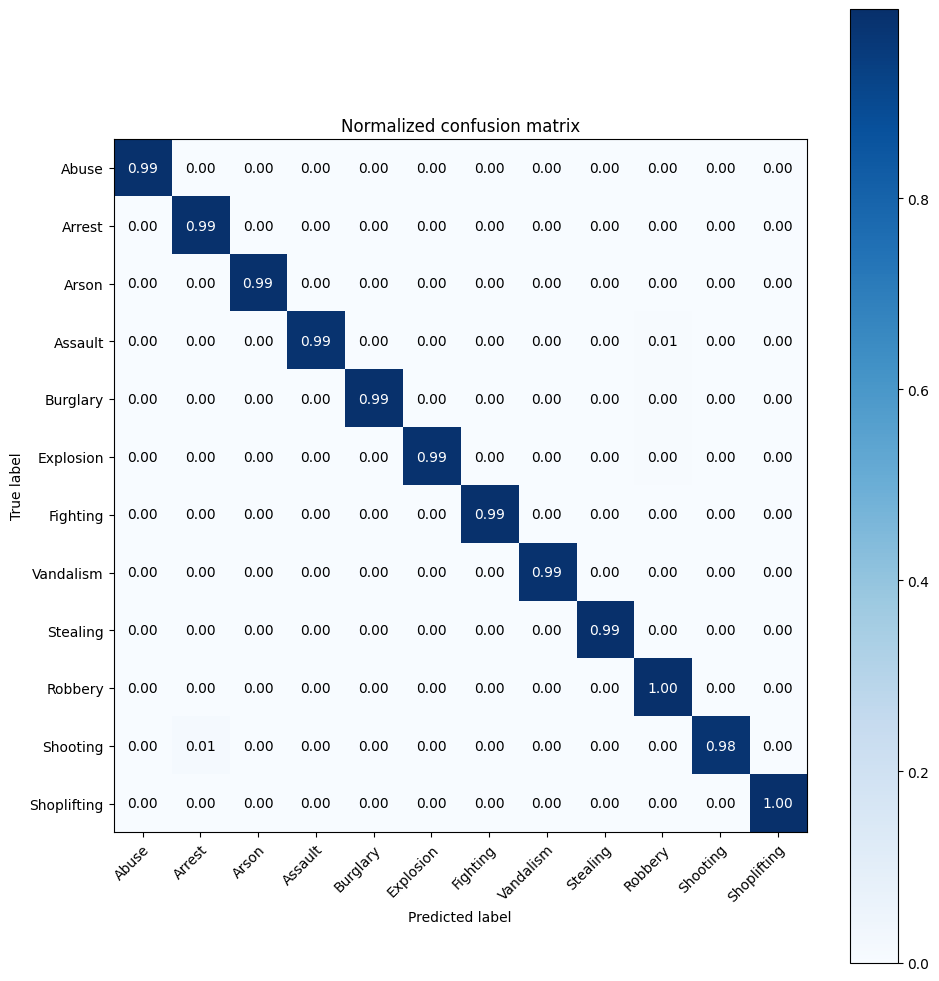

In [ ]:
class_names = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'Vandalism', 'Stealing', 'Robbery', 'Shooting', 'Shoplifting']


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 14}
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('confusion matrix1'+'CNN_LSTM'+'.png')
plt.show()
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('confusion matrix2'+'CNN_LSTM'+'.png')
plt.show()

2118/2118 [==============================] - 109s 51ms/step


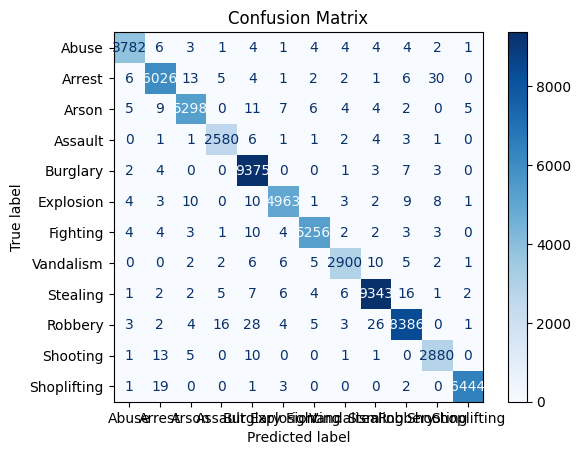

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Make predictions using the trained model on test data
predictions = model_final.predict([test_images_cnn, test_images_lstm])

# Step 2: Convert predictions from one-hot encoding back to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels (from one-hot encoding) back to class labels
true_classes = np.argmax(test_labels_lstm, axis=1)

# Step 3: Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories_labels)
disp.plot(cmap=plt.cm.Blues)

# Step 5: Show the plot
plt.title('Confusion Matrix')
plt.show()


2118/2118 [==============================] - 108s 51ms/step
Classification time: 109.29209542274475
[[3787    7    2    0    1    1    3    3    4    7    1    0]
 [   5 6044   10    4    3    1    2    1    0    6   11    9]
 [   7   14 5302    2    3    3    1    2    5   11    0    1]
 [   2    1    2 2563    3    1    3    3    4   18    0    0]
 [   3    6    1    0 9335    0    0    1    3   42    3    1]
 [   7    5   10    0    2 4959    2    4    2   20    3    0]
 [   4    5    5    1    3    2 5258    1    2    8    2    1]
 [   2    2    2    2    3    6    3 2904    6    9    0    0]
 [   2    3    3    3    3    3    1    6 9344   25    1    1]
 [   2    2    2    3    8    4    4    3   14 8436    0    0]
 [   4   37    2    1    4    1    0    1    1    4 2856    0]
 [   1    6    3    0    0    0    0    0    0    3    0 6457]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3816
           1       0.99      0.99 

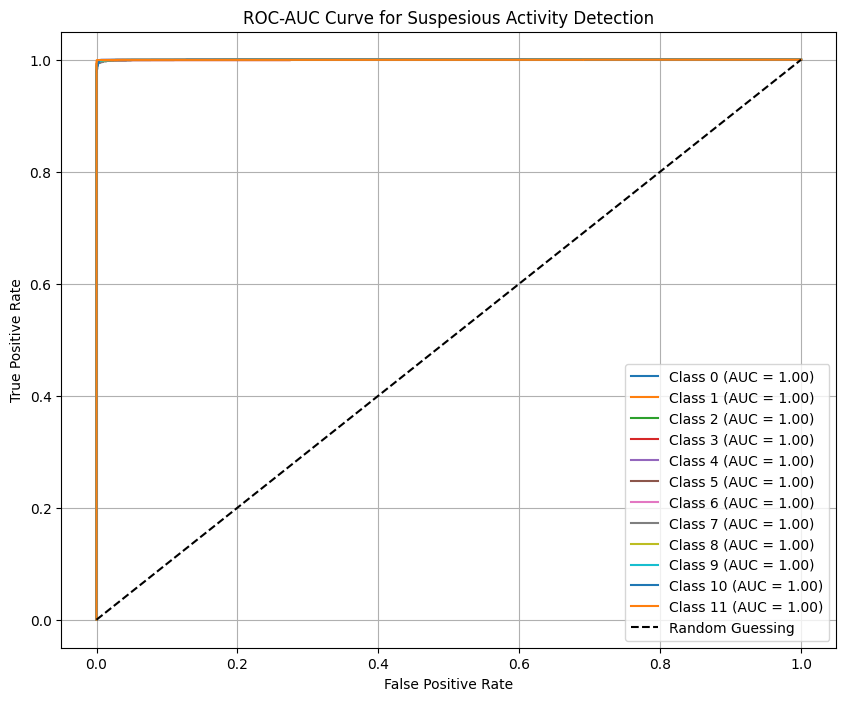

Micro-average AUC: 1.00
Macro-average AUC: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, f1_score, jaccard_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Timing the predictions
time2 = time.time()
predict_prob = fashion_model.predict([test_images_cnn, test_images_lstm])
y_pred = np.argmax(predict_prob, axis=1)
print('Classification time:', time.time() - time2)

# True labels
y_true = np.argmax(test_labels_cnn, axis=1)

# Classification metrics
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))

# Precision, recall, F1
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_true, y_pred, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score: %f' % f1)

# Intersection over Union (IoU)
print('IoU:', jaccard_score(y_true, y_pred, average='micro'))

# Model evaluation
test_eval = fashion_model.evaluate([test_images_cnn, test_images_lstm], test_labels_cnn)
loss, accuracy = fashion_model.evaluate([train_images_cnn, train_images_lstm], train_labels_cnn)
print('Train loss:', loss, 'Train accuracy:', accuracy)
print('Test loss:', test_eval[0], 'Test accuracy:', test_eval[1])

# --------- ROC-AUC Curve ---------

# Step 1: Binarize the true labels for the one-vs-rest approach
n_classes = len(np.unique(y_true))  # Total number of classes
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# Step 2: Calculate ROC curve and AUC for each class
fpr = dict()  # False Positive Rate for each class
tpr = dict()  # True Positive Rate for each class
roc_auc = dict()  # AUC for each class

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predict_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot the ROC curve for each class with AUC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Customize the plot
plt.title('ROC-AUC Curve for Suspesious Activity Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Step 4: Show the plot
plt.show()

# Step 5: Calculate and print overall AUC score (micro and macro average)
micro_roc_auc = roc_auc_score(y_true_bin, predict_prob, average='micro')
macro_roc_auc = roc_auc_score(y_true_bin, predict_prob, average='macro')

print(f'Micro-average AUC: {micro_roc_auc:.2f}')
print(f'Macro-average AUC: {macro_roc_auc:.2f}')
